In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
df = pd.read_csv('../input/water-potability/water_potability.csv')
df.shape

(3276, 10)

First Five rows of dataset

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Last five rows of dataset

## **Data Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Null values in dataset**

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

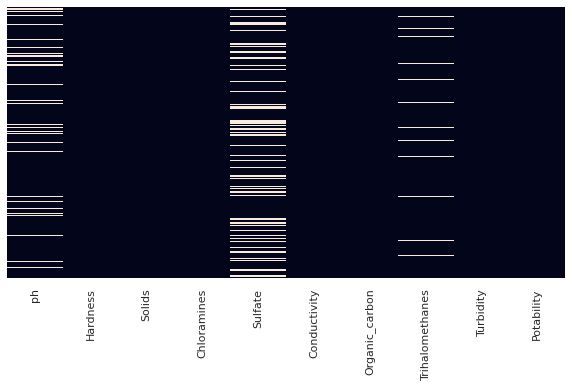

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Replacing Null values with mean

In [8]:
ndf = df
ndf['ph']=df['ph'].fillna(df['ph'].mean())
ndf['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
ndf['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [9]:
ndf.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

####  **Visualization**

Count of Target variable

<AxesSubplot:xlabel='Potability', ylabel='count'>

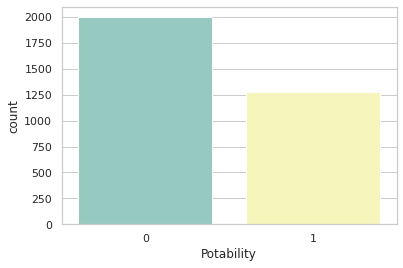

In [10]:
sns.countplot(x="Potability", data=ndf,palette="Set3")

Distribution of feature variable

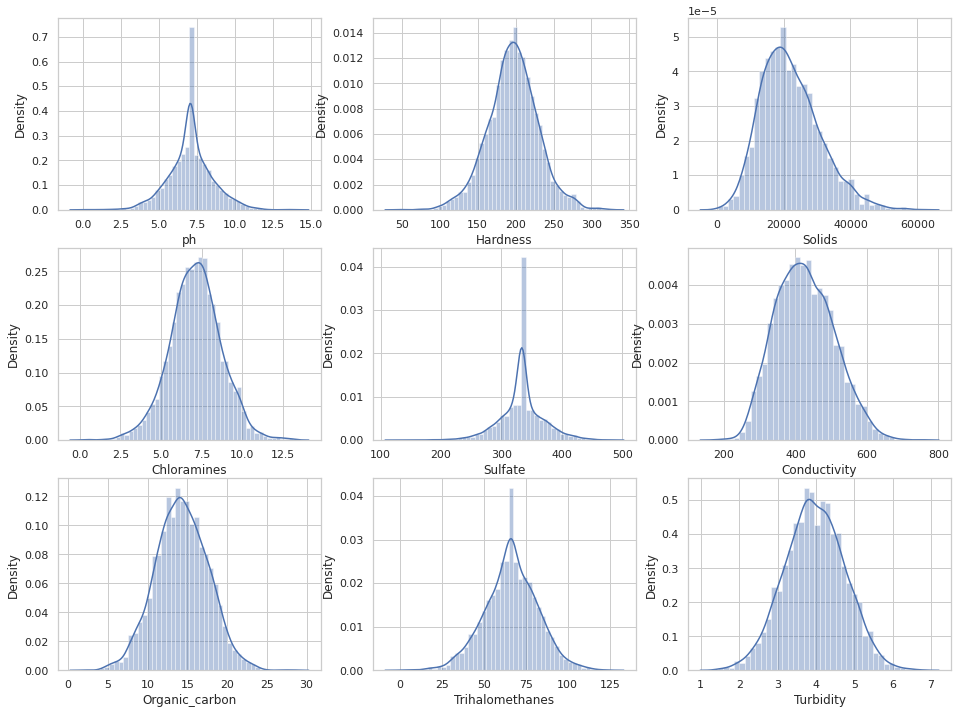

In [11]:
plt.figure(figsize=(16,12))
cdf = ndf.drop('Potability',axis=1)
for i, column in enumerate(cdf.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])

Distribution of each feature column over taget variable

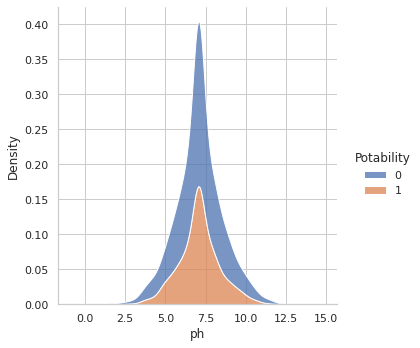

In [12]:
sns.displot(ndf, x="ph", hue="Potability", kind="kde", multiple="stack")

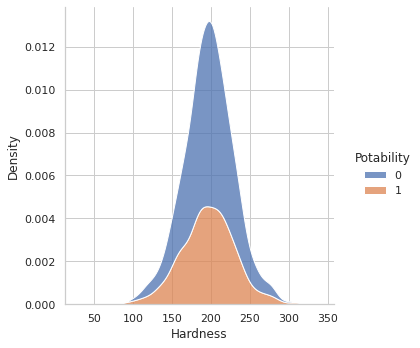

In [13]:
sns.displot(ndf, x="Hardness", hue="Potability", kind="kde", multiple="stack")

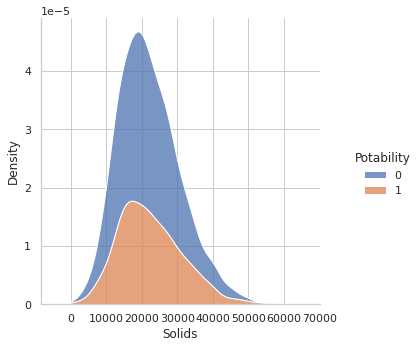

In [14]:
sns.displot(ndf, x="Solids", hue="Potability", kind="kde", multiple="stack")

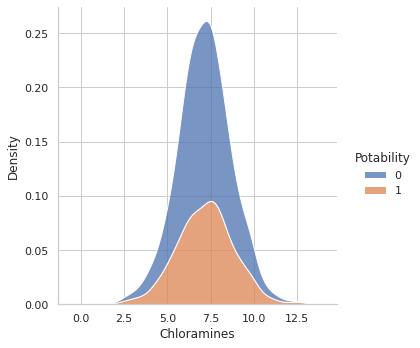

In [15]:
sns.displot(ndf, x="Chloramines", hue="Potability", kind="kde", multiple="stack")

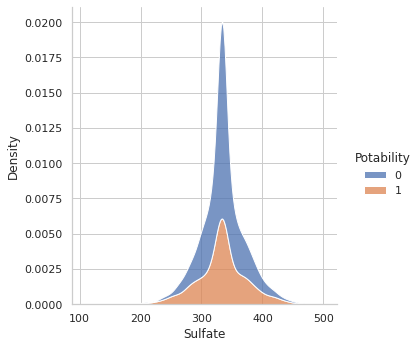

In [16]:
sns.displot(ndf, x="Sulfate", hue="Potability", kind="kde", multiple="stack")

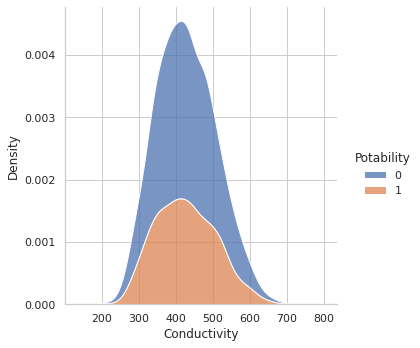

In [17]:
sns.displot(ndf, x="Conductivity", hue="Potability", kind="kde", multiple="stack")

Pplot of two variables with bivariate and univariate graphsairwise relationships

<Figure size 800x640 with 0 Axes>

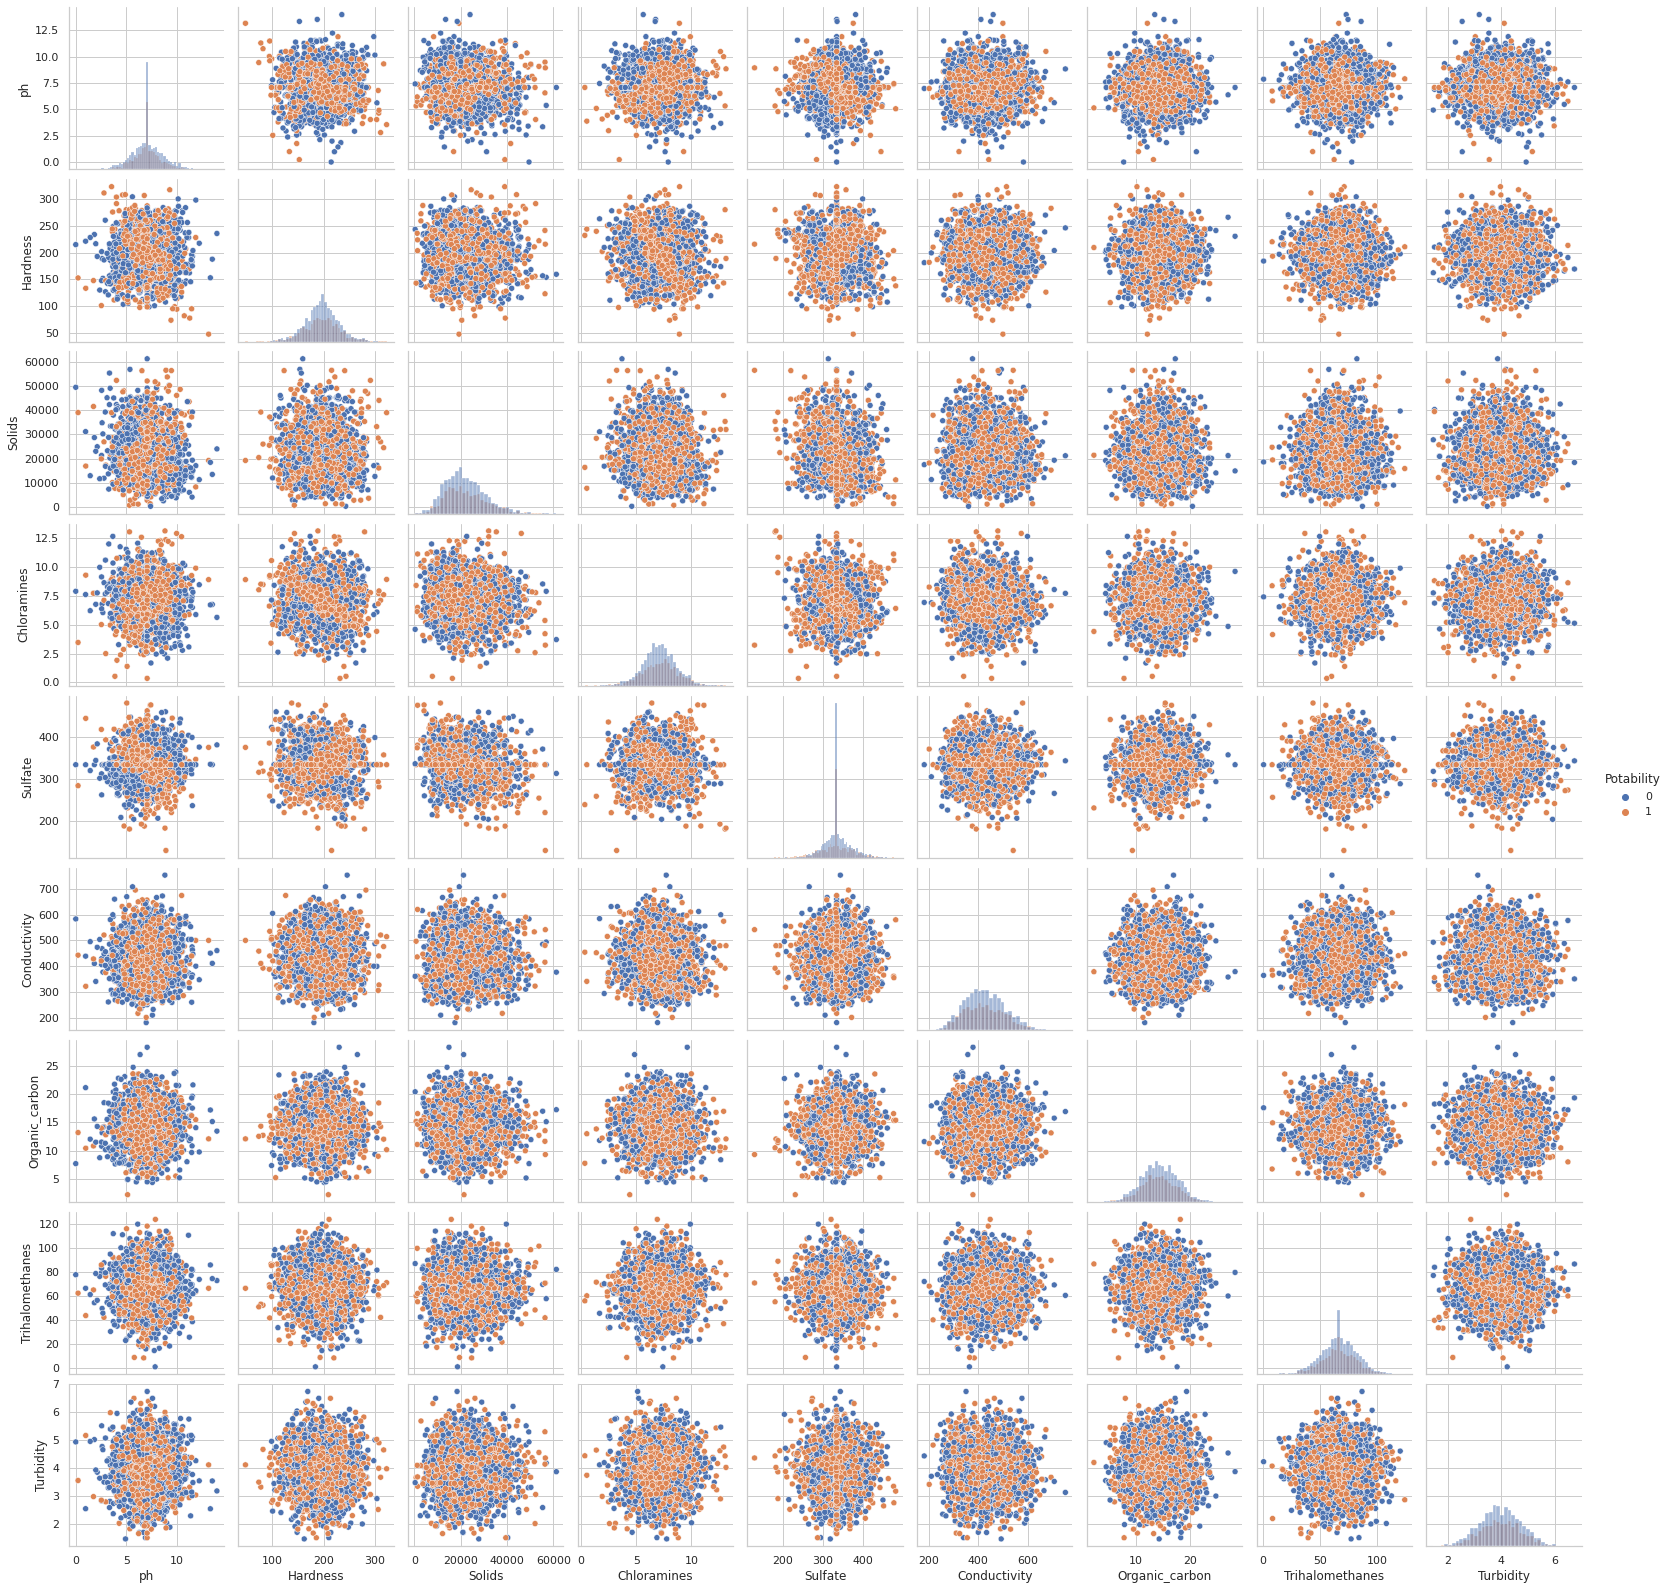

In [18]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(ndf, hue="Potability",diag_kind="hist")
plt.show()

ph and Hardness with distribution over Potability

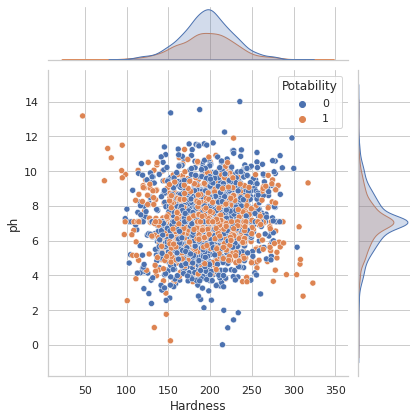

In [19]:
sns.jointplot(data=ndf, x="Hardness", y="ph",hue='Potability')

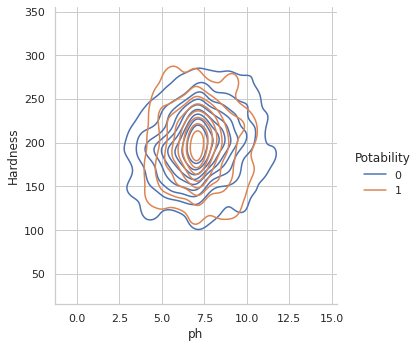

In [20]:
sns.displot(ndf, x="ph", y="Hardness", hue="Potability", kind="kde")

## **Modeling**

Spliting Feature and Target variable

In [21]:
X = ndf.drop('Potability',axis=1)
y=ndf['Potability'].copy()

**Data Splitting and Scaling**

split percentages include: **Train: 80%, Test: 20%**


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42,shuffle = True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
models ={'RandomForestClassifier':RandomForestClassifier(),'GradientBoostingClassifier':GradientBoostingClassifier(),
        'AdaBoostClassifier':AdaBoostClassifier(),'LGBMClassifier':LGBMClassifier(),
         
        }

In [24]:
training_scores= []
testing_scores=[]

for key, value in models.items():
    value.fit(X_train_scaled, y_train)
    train_score= value.score(X_train_scaled,  y_train)
    test_score= value.score(X_test_scaled, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)
    
    print(f"{key}\n")
    print("Training Accuracy: {0:.3f}".format(train_score*100))
    print("Training Accuracy: {0:.3f} \n".format(test_score*100))

RandomForestClassifier

Training Accuracy: 100.000
Training Accuracy: 67.226 

GradientBoostingClassifier

Training Accuracy: 74.237
Training Accuracy: 65.854 

AdaBoostClassifier

Training Accuracy: 65.038
Training Accuracy: 62.043 

LGBMClassifier

Training Accuracy: 95.687
Training Accuracy: 67.835 



**RandomForestClassifier** and **LGBMClassifier** performing well.

#### Hyperparameter Tuning of **Random Forest Classifier** 

In [25]:
model = RandomForestClassifier()
n_estimators = [10, 100, 500]
max_features = ['sqrt', 'log2']

# Grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.673664 using {'max_features': 'log2', 'n_estimators': 500}
0.634860 (0.023432) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.668066 (0.025858) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.673155 (0.024980) with: {'max_features': 'sqrt', 'n_estimators': 500}
0.636260 (0.027877) with: {'max_features': 'log2', 'n_estimators': 10}
0.669466 (0.025272) with: {'max_features': 'log2', 'n_estimators': 100}
0.673664 (0.024474) with: {'max_features': 'log2', 'n_estimators': 500}


In [26]:
rclf = RandomForestClassifier(max_features='log2',n_estimators= 500)
rclf.fit(X_train_scaled,y_train)
y_pred = rclf.predict(X_test_scaled)
print("Training Accuracy: {0:.3f}".format(rclf.score(X_train_scaled, y_train)*100))
print("Testing Accuracy: {0:.3f}".format(accuracy_score(y_test,y_pred)*100))


Training Accuracy: 100.000
Testing Accuracy: 69.055


In [27]:
model = LGBMClassifier(boosting_type='dart')
max_bin=[255,300,350,450]
lr=[0.01,0.001,0.0001,0.11]
num_leaves=[31,100,250]

grid = dict(max_bin=max_bin,learning_rate =lr,num_leaves=num_leaves)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.665522 using {'learning_rate': 0.11, 'max_bin': 450, 'num_leaves': 31}
0.650891 (0.019826) with: {'learning_rate': 0.01, 'max_bin': 255, 'num_leaves': 31}
0.650127 (0.018914) with: {'learning_rate': 0.01, 'max_bin': 255, 'num_leaves': 100}
0.650127 (0.018914) with: {'learning_rate': 0.01, 'max_bin': 255, 'num_leaves': 250}
0.650000 (0.019037) with: {'learning_rate': 0.01, 'max_bin': 300, 'num_leaves': 31}
0.656361 (0.021193) with: {'learning_rate': 0.01, 'max_bin': 300, 'num_leaves': 100}
0.656361 (0.021193) with: {'learning_rate': 0.01, 'max_bin': 300, 'num_leaves': 250}
0.648855 (0.019833) with: {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 31}
0.652672 (0.020998) with: {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 100}
0.652672 (0.020998) with: {'learning_rate': 0.01, 'max_bin': 350, 'num_leaves': 250}
0.650000 (0.018986) with: {'learning_rate': 0.01, 'max_bin': 450, 'num_leaves': 31}
0.653308 (0.021570) with: {'learning_rate': 0.01, 'max_bin': 450, 'num_leav

In [28]:
lgb = LGBMClassifier(learning_rate= 0.11, max_bin= 255, num_leaves= 31,boosting_type='dart')
lgb.fit(X_train_scaled,y_train)
y_pred = lgb.predict(X_test_scaled)
print("Training Accuracy: {0:.3f}".format(lgb.score(X_train_scaled, y_train)*100))
print("Testing Accuracy: {0:.3f}".format(accuracy_score(y_test,y_pred)*100))

Training Accuracy: 87.786
Testing Accuracy: 68.293


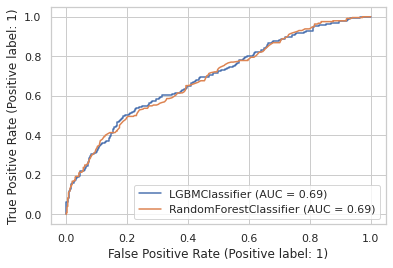

In [29]:
models = [lgb, rclf]
ax = plt.gca()
for i in models:
    plot_roc_curve(i, X_test_scaled, y_test, ax=ax)
    
